# Step 3: Data pre-processing

## **Pre-Processing - Outlier Detection, Encoding, and Scaling**  

### **Objective:**  
This phase of the project focuses on data pre-processing to prepare the dataset for subsequent model training and evaluation stages. Pre-processing is essential to ensure the model works with clean, well-distributed data, free from distortions that could negatively affect accuracy and performance.  

---

### **Approach Used: Holdout (Train-Test Split)**  

A **holdout approach (train-test split)** was adopted for this pre-processing phase. Specifically:  
- The dataset was **split into training and test sets** using `train_test_split()`.  
- **All transformations** (encoding, outlier detection, scaling) were performed **exclusively on the training set** to prevent **data leakage**.  
- The test set was **transformed using the same logic learned from the training set** but without the model “seeing” the test data during the `fit()` phase.  

---

### **Pre-Processing Steps:**  

### **1. Data Cleaning and Train-Test Split**  
- A **check for duplicates, missing values, and anomalies** was performed.  
- The dataset was split using `train_test_split()`, resulting in:  
   - **`X_train` and `X_test`** for the features.  
   - **`y_train` and `y_test`** for the target (`salary_in_usd`).  

---

### **2. Encoding Categorical Features**  
To handle categorical variables:  
- **One-Hot Encoding** was applied to **low cardinality features** (`experience_level`, `employment_type`, etc.).  
- **Ordinal Encoding** was applied to **high cardinality features** (`job_title`, `employee_residence`, etc.).  


---

### **3. Outlier Detection**  
Outlier detection was conducted using the **Interquartile Range (IQR) method**:  
- Outliers were identified and visualized for numerical features (`work_year`, `remote_ratio`).  
- **Outliers were handled exclusively in the training set** to avoid **data leakage**.  
- The test set remained unaltered to preserve its original distribution, ensuring accurate model evaluation.  

---

### **4. Scaling Numerical Features**  
**StandardScaler** was applied to normalize numerical features (`work_year` and `remote_ratio`).  
- **`fit`** was performed **only on the training set (`X_train`)** to compute the mean and standard deviation.  
- **`transform`** was applied to both **`X_train` and `X_test`**, using the parameters learned from `X_train`.  
- This prevented the test set from influencing the scaling process, ensuring the model generalizes properly to unseen data.  

---

### **Future Development: Moving Beyond Holdout**  

While the holdout approach was used in this phase to **validate and demonstrate the pre-processing pipeline**, it will not be used in future stages:  
- **During model training and evaluation (regression),** a more robust strategy such as **K-Fold Cross-Validation** will be implemented.  
- This will:  
   - Reduce variance.  
   - Leverage the entire dataset for training and validation, leading to more stable results.  

The use of holdout in this phase allowed for the implementation and validation of pre-processing techniques effectively. This approach prevents data leakage and ensures the test set remains separate from the training set.  
In future stages, pre-processing will be integrated into a full pipeline utilizing **K-Fold Cross-Validation** or other advanced techniques to produce a more stable and performant model.  


In [55]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import ipywidgets as widgets
import plotly.express as px
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer


In [56]:
# Step 1: Data Acquisition

# Loading the dataset
file_path = "dataset/salaries.csv"  
df = pd.read_csv(file_path)

## Data cleaning 

In [57]:
# Part 1: Data Cleaning

# 1. Check for Duplicates
print("\nChecking for Duplicates...")
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Drop duplicates if any
if num_duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")


Checking for Duplicates...
Number of duplicate rows: 9333
Duplicate rows removed.


In [58]:


# 2. Check for Missing Values
print("\nChecking for Missing Values...")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Imputation or Removal of Missing Values
# Strategy: Drop rows or Impute with mean/median
columns_with_null = missing_values[missing_values > 0].index
for column in columns_with_null:
    if df[column].dtype in ['float64', 'int64']:
        df[column].fillna(df[column].median(), inplace=True)
        print(f"Missing values in '{column}' filled with median.")
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)
        print(f"Missing values in '{column}' filled with mode.")

# Final Check for Missing Values
print("\nFinal Check for Missing Values:")
print(df.isnull().sum())



Checking for Missing Values...
Series([], dtype: int64)

Final Check for Missing Values:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [59]:
unique_employee_residence = df['employee_residence'].nunique()
print("Number of unique employee residence:", unique_employee_residence)

unique_job_titles = df['job_title'].nunique()
print("Number of unique job titles:", unique_job_titles)

#Check for negative salaries 
negative_salaries = df[df['salary_in_usd'] < 0]
print("Negative Salaries:")
print(negative_salaries)

#Check for data range Check for salaries outside a specific range
salary_range = (1000, 1000000)
out_of_range_salaries = df[(df['salary_in_usd'] < salary_range[0]) | (df['salary_in_usd'] > salary_range[1])]
print("Out of Range Salaries:")
print(out_of_range_salaries)

Number of unique employee residence: 79
Number of unique job titles: 254
Negative Salaries:
Empty DataFrame
Columns: [work_year, experience_level, employment_type, job_title, salary, salary_currency, salary_in_usd, employee_residence, remote_ratio, company_location, company_size]
Index: []
Out of Range Salaries:
Empty DataFrame
Columns: [work_year, experience_level, employment_type, job_title, salary, salary_currency, salary_in_usd, employee_residence, remote_ratio, company_location, company_size]
Index: []


In [60]:
# Drop the 'salary' column because we will only use salary_in_usd for this analysis
df = df.drop('salary', axis=1)

# Print the updated DataFrame
df.head()


,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Security Consultant,USD,211000,US,0,US,M
1,2024,MI,FT,Security Consultant,USD,142000,US,0,US,M
2,2024,MI,FT,Security Consultant,GBP,80521,GB,0,GB,M
3,2024,MI,FT,Security Consultant,GBP,65730,GB,0,GB,M
4,2024,MI,FT,Consultant,USD,188400,US,0,US,M


employee_residence
US       11544
Other      807
CA         519
GB         406
Name: count, dtype: int64


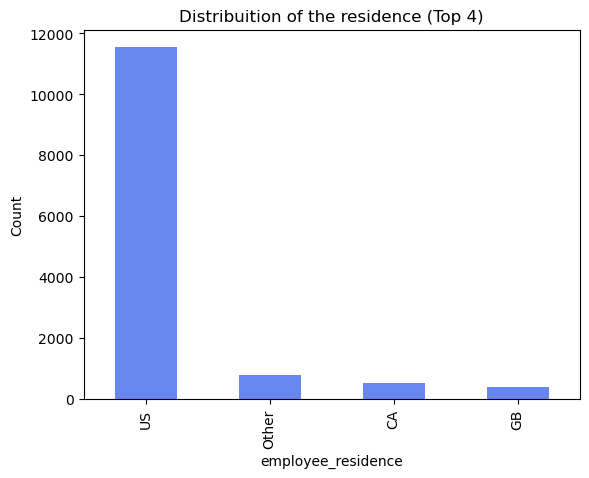

In [61]:
# Mantieni le prime 15 categorie
top_4_categories = df['employee_residence'].value_counts().head(3).index

df['employee_residence'] = df['employee_residence'].apply(
    lambda x: x if x in top_4_categories else 'Other'
)

# Visualizzazione della nuova distribuzione
print(df['employee_residence'].value_counts())

# Grafico aggiornato
df['employee_residence'].value_counts().plot(kind='bar')
plt.title('Distribuition of the residence (Top 4)')
plt.xlabel('employee_residence')
plt.ylabel('Count')
plt.show()





company_location
US       11582
Other      772
CA         514
GB         408
Name: count, dtype: int64


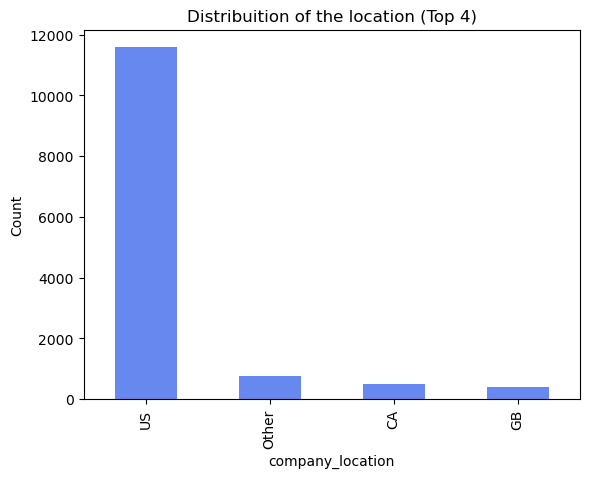

In [62]:
# Mantieni le prime 15 categorie
top_4_categories = df['company_location'].value_counts().head(3).index

df['company_location'] = df['company_location'].apply(
    lambda x: x if x in top_4_categories else 'Other'
)

# Visualizzazione della nuova distribuzione
print(df['company_location'].value_counts())

# Grafico aggiornato
df['company_location'].value_counts().plot(kind='bar')
plt.title('Distribuition of the location (Top 4)')
plt.xlabel('company_location')
plt.ylabel('Count')
plt.show()




salary_currency
USD      12292
EUR        390
GBP        389
Other      205
Name: count, dtype: int64


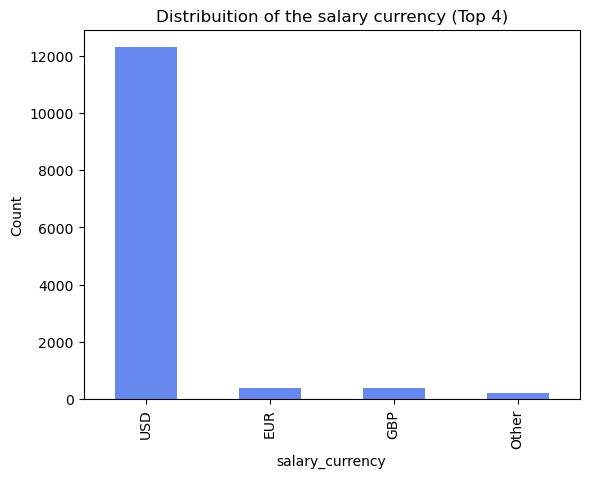

In [63]:
# Mantieni le prime 15 categorie
top_4_categories = df['salary_currency'].value_counts().head(3).index

df['salary_currency'] = df['salary_currency'].apply(
    lambda x: x if x in top_4_categories else 'Other'
)

# Visualizzazione della nuova distribuzione
print(df['salary_currency'].value_counts())

# Grafico aggiornato
df['salary_currency'].value_counts().plot(kind='bar')
plt.title('Distribuition of the salary currency (Top 4)')
plt.xlabel('salary_currency')
plt.ylabel('Count')
plt.show()



## Hold-out method

In [64]:
from sklearn.model_selection import train_test_split

# ----------- 1. Holdout Split (Train-Test) -----------
X = df.drop(columns=['salary_in_usd'])  # Feature set
y = df['salary_in_usd']  # Target

# 80% train, 20% test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")

Train set size: 10620 rows
Test set size: 2656 rows


## Encoding of the categorical features

In [65]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd



# ----------- 2. Encoding (Solo su Training Set) -----------

# 1. Define the feature sets
# low_cardinality_features = ['experience_level', 'employment_type', 'company_size']
# high_cardinality_features = ['job_title', 'employee_residence', 'company_location', 'salary_currency']

low_cardinality_features = ['employment_type', 'company_size','employee_residence','company_location','salary_currency']
high_cardinality_features = ['experience_level', 'job_title',]

# 2. Apply One-Hot Encoding for low cardinality features
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# 3. Apply Ordinal Encoding for high cardinality features
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# 4. Combine Encodings
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', ohe, low_cardinality_features),
        ('oe', oe, high_cardinality_features)
    ],
    remainder='passthrough'  # Lascia inalterate altre feature come work_year, remote_ratio
)

# ----------- 3. Apply Preprocessing (Training Set) -----------
print("\nApplying preprocessing to the training set...")
X_train_encoded = preprocessor.fit_transform(X_train)  # Fit & Transform SOLO sul training set

# Trasforma il test set usando il preprocessore addestrato
X_test_encoded = preprocessor.transform(X_test)


# ----------- 4. Conversione a DataFrame -----------
# Convertiamo le colonne codificate
ohe_columns = preprocessor.named_transformers_['ohe'].get_feature_names_out(low_cardinality_features)
all_columns = list(ohe_columns) + high_cardinality_features + ['work_year', 'remote_ratio']


X_train = pd.DataFrame(X_train_encoded, columns=all_columns)
X_test = pd.DataFrame(X_test_encoded, columns=all_columns)

# Reset degli indici per evitare problemi futuri
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# ----------- 5. Visualizzazione dei Risultati -----------
print("\nTransformed Training Set (First 5 rows):")
print(X_train.head())
print("\nTransformed Test Set (First 5 rows):")
print(X_test.head())



Applying preprocessing to the training set...

Transformed Training Set (First 5 rows):
   employment_type_CT  employment_type_FL  employment_type_FT  \
0                 0.0                 0.0                 1.0   
1                 0.0                 0.0                 1.0   
2                 0.0                 0.0                 1.0   
3                 0.0                 0.0                 1.0   
4                 0.0                 0.0                 1.0   

   employment_type_PT  company_size_L  company_size_M  company_size_S  \
0                 0.0             0.0             1.0             0.0   
1                 0.0             0.0             1.0             0.0   
2                 0.0             0.0             1.0             0.0   
3                 0.0             0.0             1.0             0.0   
4                 0.0             0.0             1.0             0.0   

   employee_residence_CA  employee_residence_GB  employee_residence_Other  \
0   

### Outlier detection


Visualizing Outliers with Boxplots (Training Set Only):


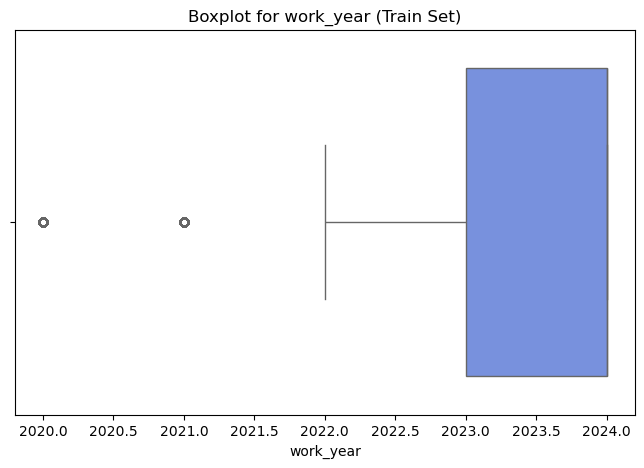

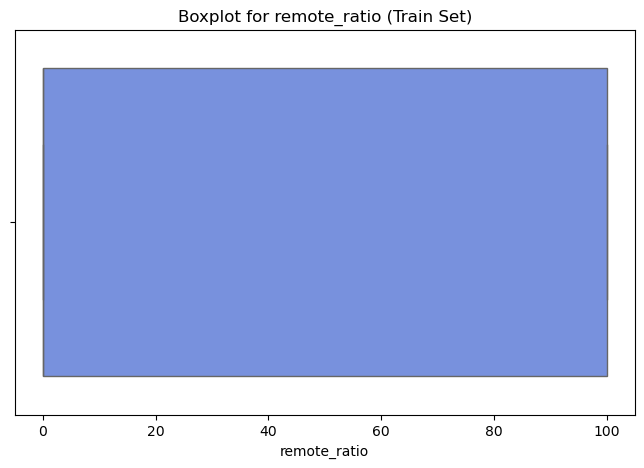


Identifying Outliers Using IQR Method (Training Set Only):

Feature: employment_type_CT
 - Lower Bound: 0.0
 - Upper Bound: 0.0
 - Number of Outliers: 26

Feature: employment_type_FL
 - Lower Bound: 0.0
 - Upper Bound: 0.0
 - Number of Outliers: 4

Feature: employment_type_FT
 - Lower Bound: 1.0
 - Upper Bound: 1.0
 - Number of Outliers: 68

Feature: employment_type_PT
 - Lower Bound: 0.0
 - Upper Bound: 0.0
 - Number of Outliers: 38

Feature: company_size_L
 - Lower Bound: 0.0
 - Upper Bound: 0.0
 - Number of Outliers: 1035

Feature: company_size_M
 - Lower Bound: 1.0
 - Upper Bound: 1.0
 - Number of Outliers: 1144

Feature: company_size_S
 - Lower Bound: 0.0
 - Upper Bound: 0.0
 - Number of Outliers: 109

Feature: employee_residence_CA
 - Lower Bound: 0.0
 - Upper Bound: 0.0
 - Number of Outliers: 408

Feature: employee_residence_GB
 - Lower Bound: 0.0
 - Upper Bound: 0.0
 - Number of Outliers: 335

Feature: employee_residence_Other
 - Lower Bound: 0.0
 - Upper Bound: 0.0
 - Number 

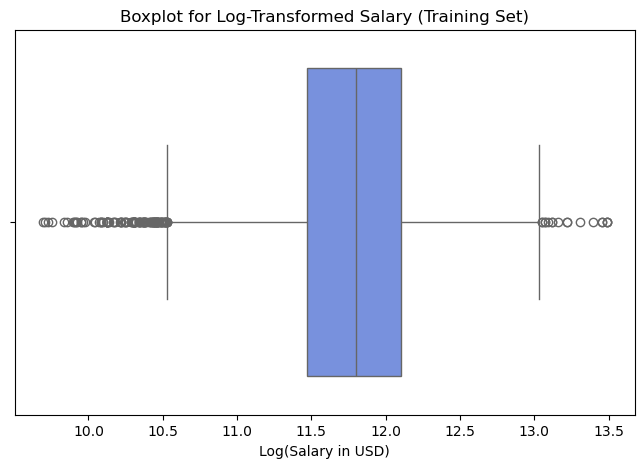


Applying Same Log Transformation to Test Set...


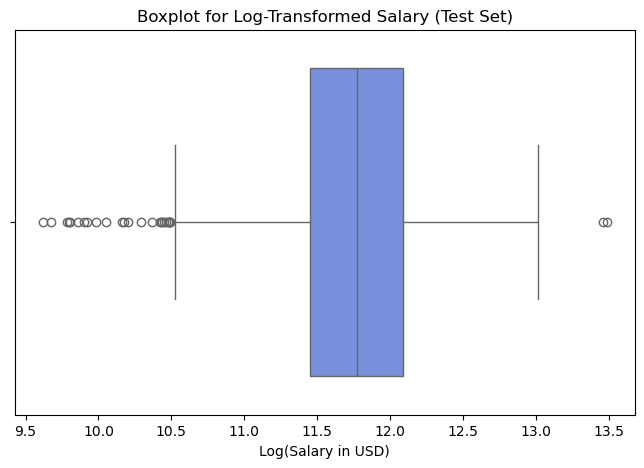

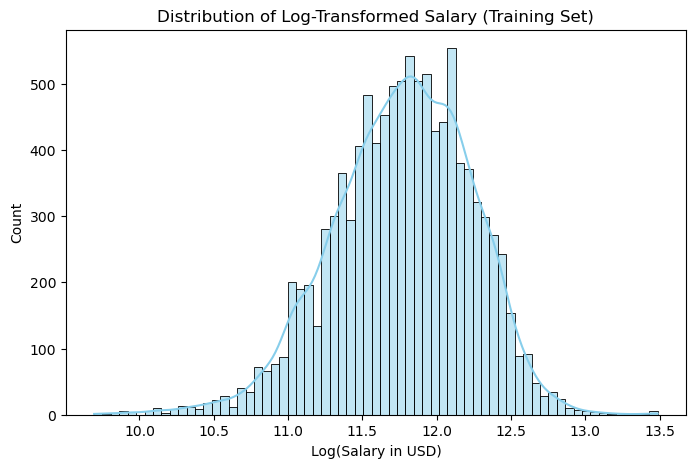

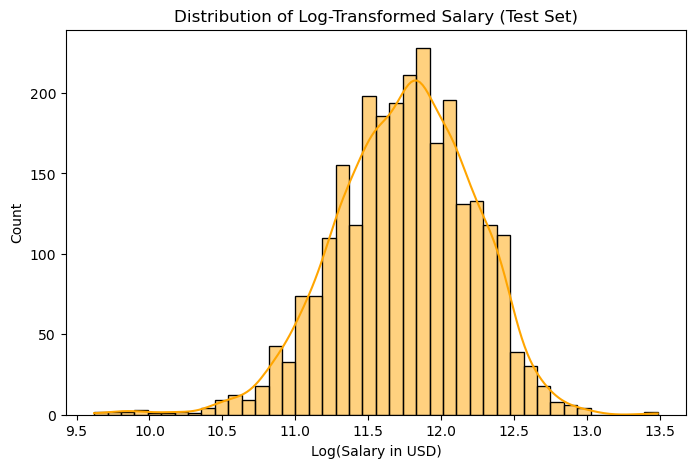


Log Transformation Applied Successfully!
   work_year experience_level employment_type            job_title  \
0       2024               MI              FT  Security Consultant   
1       2024               MI              FT  Security Consultant   
2       2024               MI              FT  Security Consultant   
3       2024               MI              FT  Security Consultant   
4       2024               MI              FT           Consultant   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         211000                 US             0   
1             USD         142000                 US             0   
2             GBP          80521                 GB             0   
3             GBP          65730                 GB             0   
4             USD         188400                 US             0   

  company_location company_size  
0               US            M  
1               US            M  
2               GB  

In [66]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# -------- Step 3: Outlier Analysis (Training Set Only) --------
print("\nVisualizing Outliers with Boxplots (Training Set Only):")

# Consideriamo solo il training set per l'analisi degli outlier
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns
sns.set_palette("coolwarm")

# 1. Visualizza i boxplot per il training set
for column in numerical_features:
    if column == 'work_year' or column == 'remote_ratio':
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=X_train[column])
        plt.title(f"Boxplot for {column} (Train Set)")
        plt.xlabel(column)
        plt.show()

# -------- 2. Identificazione degli Outlier con IQR (Training Set) --------
print("\nIdentifying Outliers Using IQR Method (Training Set Only):")

outlier_info = {}

for column in numerical_features:
    Q1 = X_train[column].quantile(0.25)
    Q3 = X_train[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Conta outlier solo nel training set
    outliers = X_train[(X_train[column] < lower_bound) | (X_train[column] > upper_bound)]
    num_outliers = outliers.shape[0]
    
    outlier_info[column] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Number of Outliers': num_outliers
    }
    print(f"\nFeature: {column}")
    print(f" - Lower Bound: {lower_bound}")
    print(f" - Upper Bound: {upper_bound}")
    print(f" - Number of Outliers: {num_outliers}")

# -------- 3. Riepilogo Outlier --------
print("\nOutlier Summary (Before Log Transformation):")
for feature, info in outlier_info.items():
    print(f"{feature}: {info['Number of Outliers']} outliers")

# -------- 4. Trasformazione Logaritmica (Training Set) --------
print("\nApplying Log Transformation to 'salary_in_usd' (Training Set Only)...")

# Applica log-transform solo al training set
X_train_copy = X_train.copy()
y_train_log = np.log1p(y_train)

plt.figure(figsize=(8, 5))
sns.boxplot(x=y_train_log)
plt.title("Boxplot for Log-Transformed Salary (Training Set)")
plt.xlabel("Log(Salary in USD)")
plt.show()

# -------- 5. Applica la Trasformazione al Test Set (Senza Fit) --------
print("\nApplying Same Log Transformation to Test Set...")

X_test_copy = X_test.copy()
y_test_log = np.log1p(y_test)

plt.figure(figsize=(8, 5))
sns.boxplot(x=y_test_log)
plt.title("Boxplot for Log-Transformed Salary (Test Set)")
plt.xlabel("Log(Salary in USD)")
plt.show()

# -------- 6. Visualizza la Distribuzione Post-Transform --------
plt.figure(figsize=(8, 5))
sns.histplot(y_train_log, kde=True, color='skyblue')
plt.title("Distribution of Log-Transformed Salary (Training Set)")
plt.xlabel("Log(Salary in USD)")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(y_test_log, kde=True, color='orange')
plt.title("Distribution of Log-Transformed Salary (Test Set)")
plt.xlabel("Log(Salary in USD)")
plt.show()

print("\nLog Transformation Applied Successfully!")
print(df.head())

### **Why Applying Log Transformation to Outliers is Useful**  

---

#### 1. **Outliers Represent Real-World Variability**  
- In fields like **cybersecurity**, large variations in salaries are realistic. For example:  
  - Senior professionals or specialized roles may have exceptionally high salaries.  
  - Freelancers or entry-level positions may show lower salaries.  
- **We do not remove outliers**, but instead reduce their impact by applying a log transformation, preserving **all variability** without distorting the data.  

---

#### 2. **Log Transformation Preserves Valuable Trends**  
- Outliers may reveal **valuable patterns** or anomalies in the data:  
  - Companies paying significantly higher salaries in certain locations.  
  - Rare but critical job titles with very high compensation.  
- By applying a log transformation:  
  - **Outliers are retained**, but their influence is compressed, reducing their negative impact on the model.  
  - Trends remain visible, but the model can handle them more effectively.  

---

#### 3. **Realistic Salary Predictions with Full Data**  
- Removing outliers can lead to **overly simplistic models** that are less applicable to real-world scenarios.  
- Log transformation allows the model to **understand the full range of salaries** without excluding extreme values.  
- **Predictions become more accurate** because the model learns from real data, including the most extreme cases.  

---

#### 4. **Domain Context Justifies Salary Variations**  
- Cybersecurity salaries naturally vary based on:  
  - **Geography**: Certain regions (e.g., US, Western Europe) have higher pay scales.  
  - **Experience**: Senior-level employees can earn salaries far beyond the median.  
  - **Role**: Advanced positions such as Security Architects and Penetration Testers receive higher compensation.  
- **Log transformation retains this data**, avoiding distortions in the analysis of such important variations.  

---

#### 5. **Log Transformation Makes Models More Robust**  
- Models like **linear regression** or neural networks are sensitive to outliers.  
- Log transformation reduces their influence by:  
  - Compressing extremely high salaries, making them less dominant in the predictions.  
  - **Robust models like Random Forest or XGBoost** can still benefit from the transformation, even though they are more resilient to outliers.  

---

### **Conclusion**  
Instead of removing outliers in the `salary_in_usd` column, we applied a **log transformation** to reduce their impact without losing valuable data.  
This approach preserves **real-world variability** and ensures the model captures the entire salary range effectively.  

If necessary, we can reverse the transformation after predictions to interpret the results in **USD** (`np.expm1()`).  


## Feature Selection and Scaling


1. Correlation Analysis for Numerical Features Only (Training Set):


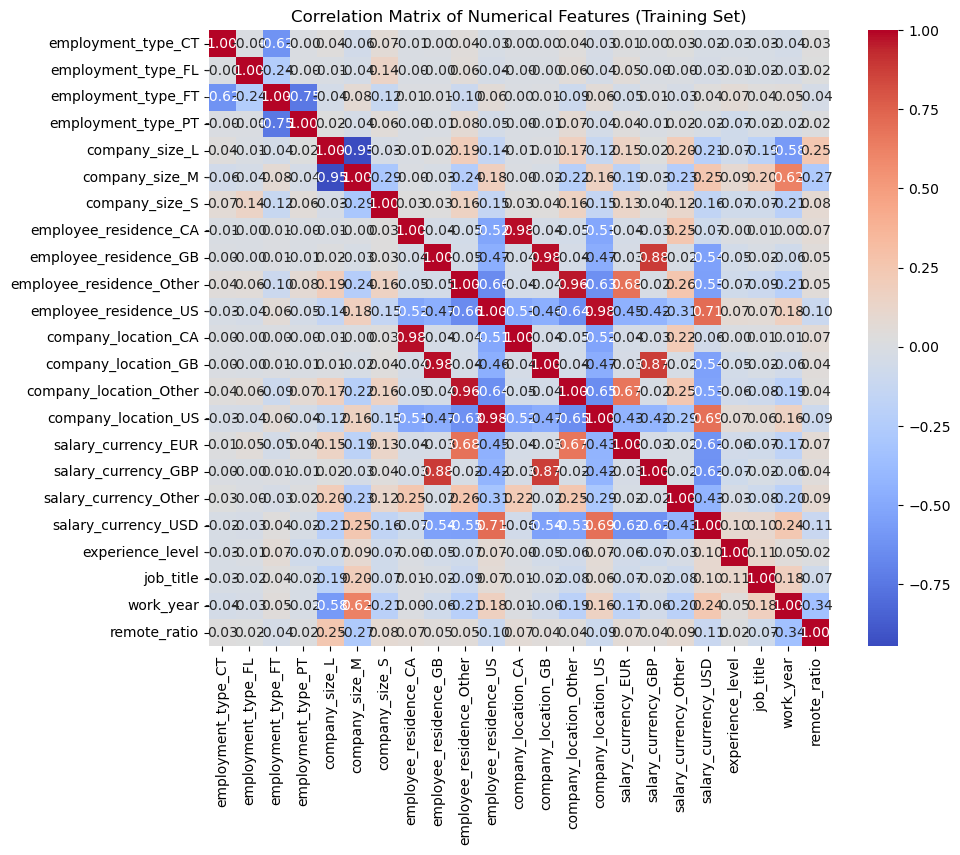


Highly Correlated Feature Pairs (Correlation > 0.85):
 - company_size_L and company_size_M
 - company_size_M and company_size_L
 - employee_residence_CA and company_location_CA
 - employee_residence_GB and company_location_GB
 - employee_residence_GB and salary_currency_GBP
 - employee_residence_Other and company_location_Other
 - employee_residence_US and company_location_US
 - company_location_CA and employee_residence_CA
 - company_location_GB and employee_residence_GB
 - company_location_GB and salary_currency_GBP
 - company_location_Other and employee_residence_Other
 - company_location_US and employee_residence_US
 - salary_currency_GBP and employee_residence_GB
 - salary_currency_GBP and company_location_GB

Dropped features due to high correlation: ['company_size_M', 'employee_residence_GB', 'company_size_L', 'company_location_Other', 'employee_residence_CA', 'company_location_CA', 'company_location_GB', 'employee_residence_Other', 'salary_currency_GBP', 'employee_residence_US

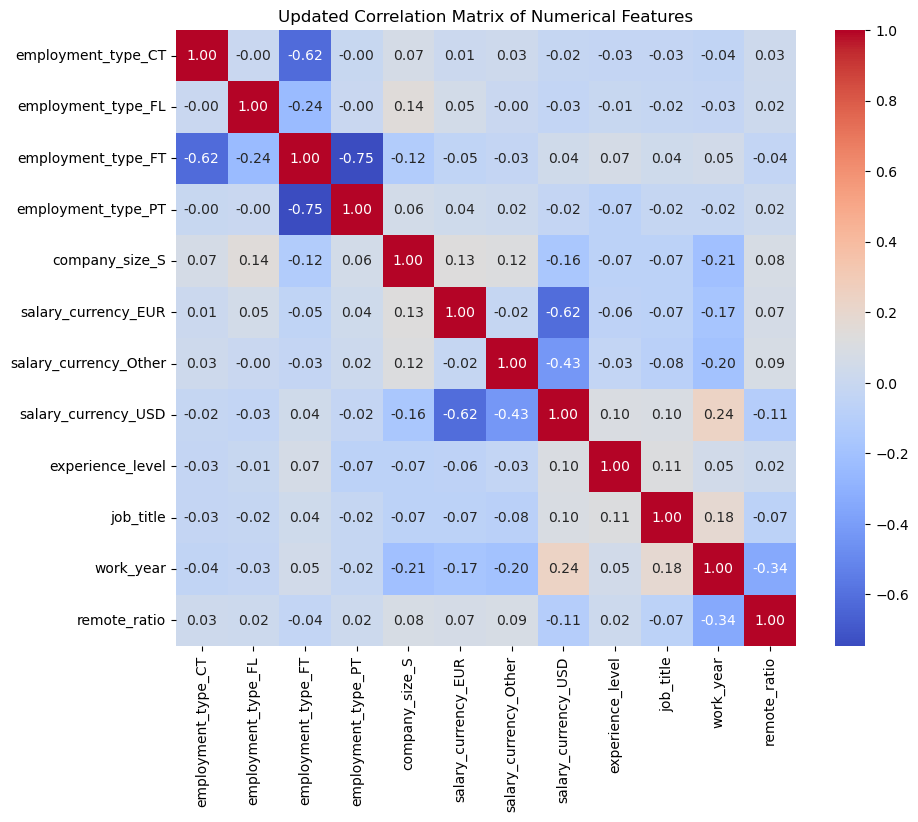


2. Scaling work_year and remote_ratio with StandardScaler (Training Set Only):


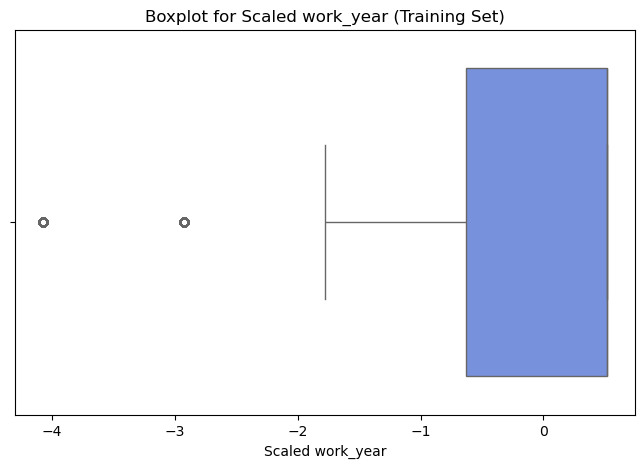

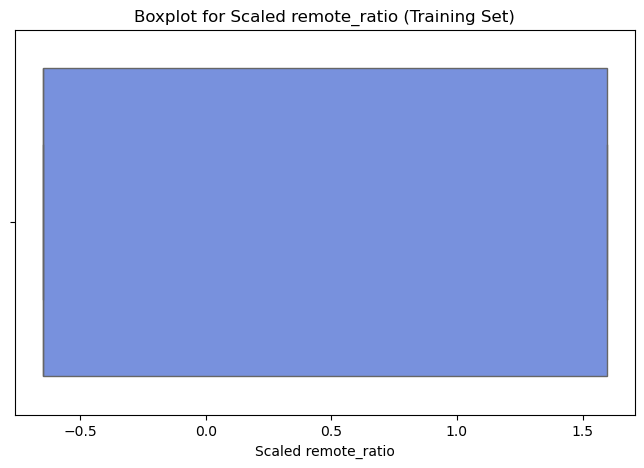


First 5 rows after scaling (Training Set):
   work_year  remote_ratio
0   0.515668     -0.647793
1  -1.779550      1.596030
2   0.515668     -0.647793
3  -0.631941     -0.647793
4   0.515668      1.596030

Summary statistics after scaling work_year and remote_ratio (Training Set):
          work_year  remote_ratio
count  1.062000e+04  1.062000e+04
mean  -6.947930e-14  6.824422e-17
std    1.000047e+00  1.000047e+00
min   -4.074768e+00 -6.477929e-01
25%   -6.319412e-01 -6.477929e-01
50%    5.156675e-01 -6.477929e-01
75%    5.156675e-01  1.596030e+00
max    5.156675e-01  1.596030e+00

Summary statistics after scaling work_year and remote_ratio (Test Set):
         work_year  remote_ratio
count  2656.000000   2656.000000
mean      0.036921     -0.036148
std       0.963067      0.985010
min      -4.074768     -0.647793
25%      -0.631941     -0.647793
50%       0.515668     -0.647793
75%       0.515668      1.596030
max       0.515668      1.596030


In [67]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# -------- Step 4: Feature Selection and Scaling (Training Set Only) --------

# 1. Correlation Analysis for Numerical Features (Train Set)
print("\n1. Correlation Analysis for Numerical Features Only (Training Set):")

# Seleziona colonne numeriche da X_train (senza il target)
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns

# Calcola la matrice di correlazione solo sul training set
correlation_matrix = X_train[numerical_features].corr()

# Visualizza la matrice di correlazione
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features (Training Set)")
plt.show()

# -------- 2. Identifica Coppie Altamente Correlate --------
threshold = 0.85  # Soglia per considerare la correlazione alta
high_corr_pairs = []

for col in correlation_matrix.columns:
    for idx in correlation_matrix.index:
        if col != idx and abs(correlation_matrix.loc[idx, col]) > threshold:
            high_corr_pairs.append((col, idx))

# Stampa le feature altamente correlate
if high_corr_pairs:
    print("\nHighly Correlated Feature Pairs (Correlation > 0.85):")
    for pair in high_corr_pairs:
        print(f" - {pair[0]} and {pair[1]}")
else:
    print("\nNo highly correlated features found.")

# -------- 3. Elimina le Feature Altamente Correlate (Training Set) --------
features_to_drop = list(set([pair[1] for pair in high_corr_pairs]))

if features_to_drop:
    X_train = X_train.drop(columns=features_to_drop)
    X_test = X_test.drop(columns=features_to_drop)
    print(f"\nDropped features due to high correlation: {features_to_drop}")
else:
    print("\nNo features were dropped due to high correlation.")

# -------- 4.1 Stampa della Matrice di Correlazione Aggiornata --------
updated_correlation_matrix = X_train.corr()

print("\nUpdated Correlation Matrix (After Dropping Highly Correlated Features):")
print(updated_correlation_matrix)

# Visualizza la matrice aggiornata
plt.figure(figsize=(10, 8))
sns.heatmap(updated_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Updated Correlation Matrix of Numerical Features")
plt.show()

# -------- 4.2 Scaling di work_year e remote_ratio (SOLO TRAINING SET) --------
print("\n2. Scaling work_year and remote_ratio with StandardScaler (Training Set Only):")

scaler = StandardScaler()

# Applica lo scaling solo sulle colonne selezionate nel training set
X_train[['work_year', 'remote_ratio']] = scaler.fit_transform(X_train[['work_year', 'remote_ratio']])

# Trasforma il test set con lo stesso scaler (senza fit)
X_test[['work_year', 'remote_ratio']] = scaler.transform(X_test[['work_year', 'remote_ratio']])

# -------- 5. Visualizzazione Scaling --------
# Visualizza il risultato per work_year e remote_ratio dopo lo scaling (train set)
plt.figure(figsize=(8, 5))
sns.boxplot(x=X_train['work_year'])
plt.title("Boxplot for Scaled work_year (Training Set)")
plt.xlabel("Scaled work_year")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=X_train['remote_ratio'])
plt.title("Boxplot for Scaled remote_ratio (Training Set)")
plt.xlabel("Scaled remote_ratio")
plt.show()

# -------- 6. Controllo e Verifica --------
print("\nFirst 5 rows after scaling (Training Set):")
print(X_train[['work_year', 'remote_ratio']].head())

print("\nSummary statistics after scaling work_year and remote_ratio (Training Set):")
print(X_train[['work_year', 'remote_ratio']].describe())

print("\nSummary statistics after scaling work_year and remote_ratio (Test Set):")
print(X_test[['work_year', 'remote_ratio']].describe())
